In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [2]:
!pip install kaggle

import os
os.environ['KAGGLE_USERNAME'] = 'jayshinde0110' # Replace with your Kaggle username
os.environ['KAGGLE_KEY'] = '96ea1ac4400aa0d9fe845fba0b40fbc8' # Replace with your Kaggle API key

!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

# Unzip the downloaded dataset
!unzip brain-tumor-mri-dataset.zip -d brain-tumor-mri-dataset

Streaming output truncated to the last 5000 lines.
  inflating: brain-tumor-mri-dataset/Training/glioma/Tr-gl_0712.jpg  
  inflating: brain-tumor-mri-dataset/Training/glioma/Tr-gl_0713.jpg  
  inflating: brain-tumor-mri-dataset/Training/glioma/Tr-gl_0714.jpg  
  inflating: brain-tumor-mri-dataset/Training/glioma/Tr-gl_0715.jpg  
  inflating: brain-tumor-mri-dataset/Training/glioma/Tr-gl_0716.jpg  
  inflating: brain-tumor-mri-dataset/Training/glioma/Tr-gl_0717.jpg  
  inflating: brain-tumor-mri-dataset/Training/glioma/Tr-gl_0718.jpg  
  inflating: brain-tumor-mri-dataset/Training/glioma/Tr-gl_0719.jpg  
  inflating: brain-tumor-mri-dataset/Training/glioma/Tr-gl_0720.jpg  
  inflating: brain-tumor-mri-dataset/Training/glioma/Tr-gl_0721.jpg  
  inflating: brain-tumor-mri-dataset/Training/glioma/Tr-gl_0722.jpg  
  inflating: brain-tumor-mri-dataset/Training/glioma/Tr-gl_0723.jpg  
  inflating: brain-tumor-mri-dataset/Training/glioma/Tr-gl_0724.jpg  
  inflating: brain-tumor-mri-dataset/Tr

In [3]:
#Use generateor to process the large data in batches in the RAM
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/brain-tumor-mri-dataset/Training',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/brain-tumor-mri-dataset/Testing',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [4]:
#As the data is in the range of 0 - 255, normalize it
def preprocess(image, label):
    image = tf.cast(image/255., tf.float32)
    return image, label

train_ds = train_ds.map(preprocess)
validation_ds = validation_ds.map(preprocess)

In [5]:
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D

# # Create the base ResNet50 model
# resnet = VGG19(
#     weights='imagenet',
#     include_top=False,
#     input_shape=(256, 256, 3)
# )

# # Freeze the layers of the ResNet50 base model so they are not trained
# for layer in resnet.layers:
#     layer.trainable = False

# for layer in resnet.layers[-30:]:
#     layer.trainable = True

# # Create a new model on top of the ResNet50 base
# model = Sequential()
# model.add(resnet)
# model.add(GlobalAveragePooling2D())
# model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(4, activation='softmax'))

In [6]:
#Create a CNN Model

model = Sequential()

model.add(Conv2D(64, kernel_size= (3,3), padding='valid', activation = 'relu', input_shape = (256,256,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size = (3,3), padding='valid', activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size = (3,3), padding='valid', activation = 'relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,871,492 (56.73 MB)

 Trainable params: 14,871,236 (56.73 MB)

 Non-trainable params: 256 (1.00 KB)

In [8]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

EarlyStopping = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=1,
    mode="max",
    baseline=None,
    restore_best_weights=False,
)



# Create the callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=0,
    min_lr=1e-6,
    verbose=1
)



model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(train_ds, epochs = 30, validation_data = validation_ds, callbacks=[EarlyStopping, reduce_lr])

Epoch 1/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 41s 167ms/step - accuracy: 0.6850 - loss: 0.9240 - val_accuracy: 0.7414 - val_loss: 1.0318 - learning_rate: 0.0010
Epoch 2/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step - accuracy: 0.8747 - loss: 0.3648 - val_accuracy: 0.6415 - val_loss: 0.8751 - learning_rate: 0.0010
Epoch 3/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.9099 - loss: 0.2617 - val_accuracy: 0.8909 - val_loss: 0.3426 - learning_rate: 0.0010
Epoch 4/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step - accuracy: 0.9284 - loss: 0.1968 - val_accuracy: 0.8787 - val_loss: 0.3211 - learning_rate: 0.0010
Epoch 5/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9446 - loss: 0.1516 - val_accuracy: 0.9100 - val_loss: 0.2461 - learning_rate: 0.0010
Epoch 6/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.9496 - loss: 0.1359 - val_accuracy: 0.9397 - val_loss: 0.1932 - learning_rate: 0.0010
Epoch 7/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9642 - 

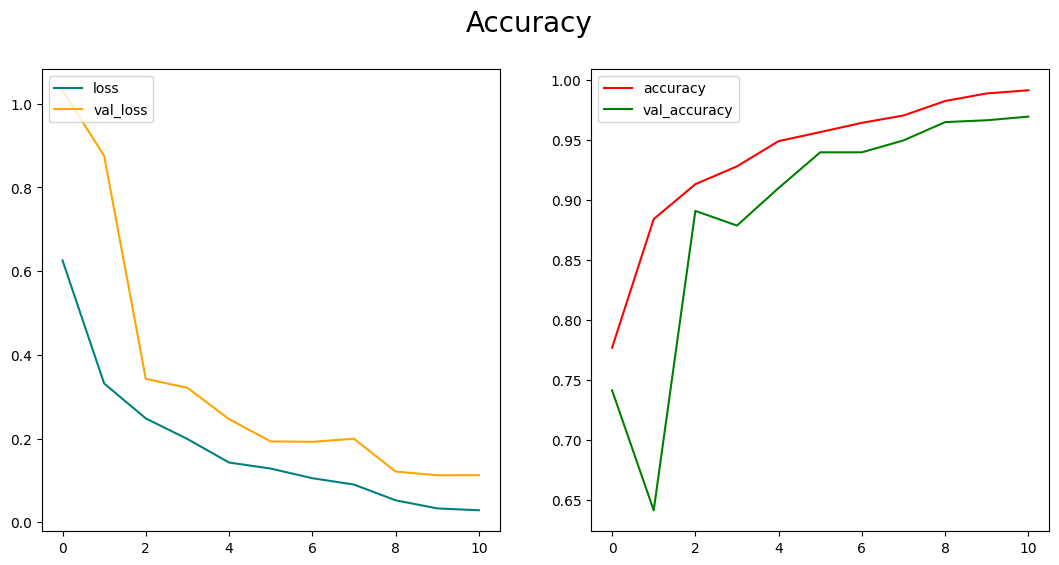

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='red', label='accuracy')
plt.plot(history.history['val_accuracy'], color='green', label='val_accuracy')
plt.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")

In [11]:
# prompt: test on an image named as xyz

from PIL import Image
import numpy as np

# Load and preprocess the image
image_path = 'menin.jpg'  # Make sure this is the correct path to your image
img = Image.open(image_path).resize((256, 256))  # Resize to the model's input size
img_array = np.array(img)  # Convert to numpy array
img_array = img_array / 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension

# Make a prediction
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Assuming your labels are mapped to integers 0, 1, 2, 3 based on the directory structure
# You'll need to know the mapping from index to class name.
# For example, if your directories are 'glioma', 'meningioma', 'notumor', 'pituitary'
# and they were loaded in that order, the mapping could be:
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary'] # Update with your actual class names and order

# Get the predicted class name
predicted_class_name = class_names[predicted_class_index]

print(f"The predicted class for the image '{image_path}' is: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The predicted class for the image 'menin.jpg' is: meningioma


In [12]:
import pickle

pickle_model_path ="model.pkl"
with open (pickle_model_path, 'wb') as file:
    pickle.dump(model, file)